In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = 'veneto'

path_data = f'{path_root}/data'
path_img_root = f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,5,Veneto,12,7,19,23,42,10,10,...,0.0,1580.0,0.0,7.0,36.84,45.24,0.63,0.00,75.00,31.25
1,2020-02-26T18:00:00,5,Veneto,16,8,24,45,69,27,28,...,1.0,1120.0,0.0,22.0,33.33,34.78,2.50,0.00,14.29,64.29
2,2020-02-27T18:00:00,5,Veneto,19,8,27,82,109,40,40,...,0.0,1264.0,0.0,37.0,29.63,24.77,3.16,0.00,0.00,57.97
3,2020-02-28T18:00:00,5,Veneto,24,9,33,116,149,40,40,...,0.0,1250.0,0.0,34.0,27.27,22.15,3.20,0.00,12.50,36.70
4,2020-02-29T17:00:00,5,Veneto,24,11,35,154,189,40,40,...,0.0,1245.0,0.0,38.0,31.43,18.52,3.21,0.00,22.22,26.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,2021-03-09T17:00:00,5,Veneto,1013,141,1154,29056,30210,696,1608,...,29.0,43279.0,5577.0,629.0,12.22,3.82,3.72,28.83,2.92,2.36
379,2021-03-10T17:00:00,5,Veneto,1061,148,1209,29579,30788,578,1561,...,14.0,43293.0,4941.0,523.0,12.24,3.93,3.61,31.59,4.96,1.91
380,2021-03-11T17:00:00,5,Veneto,1073,154,1227,30447,31674,886,1677,...,22.0,42994.0,5395.0,868.0,12.55,3.87,3.90,31.08,4.05,2.88
381,2021-03-12T17:00:00,5,Veneto,1106,154,1260,31290,32550,876,1932,...,29.0,46146.0,5550.0,843.0,12.22,3.87,4.19,34.81,0.00,2.77


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 13, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 2682
Nuovi tamponi: 51799.0
Percentuale nuovi positivi/nuovi tamponi: 5.2 %
Nuovi guariti: 1146.0
Nuovi deceduti: 24.0
Variazione positivi ricoverati con sintomi: 5.0
Variazione positivi in terapia intensiva: 16.0
Variazione positivi in isolamento dimiciliare: 1491.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 13, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-12T17:00:00,5,Veneto,2596,359,2955,81770,84725,-2815,2134,...,166.0,15867.0,4032.0,-2830.0,12.15,3.49,13.45,52.93,0.28,-3.22
1,2021-01-13T17:00:00,5,Veneto,2551,336,2887,79083,81970,-2755,1884,...,91.0,19063.0,3747.0,-2687.0,11.64,3.52,9.88,50.28,-6.41,-3.25
2,2021-01-14T17:00:00,5,Veneto,2447,328,2775,77050,79825,-2145,2076,...,101.0,14904.0,4329.0,-2033.0,11.82,3.48,13.93,47.96,-2.38,-2.62
3,2021-01-15T17:00:00,5,Veneto,2386,327,2713,72640,75353,-4472,1079,...,74.0,57842.0,4043.0,-4410.0,12.05,3.60,1.87,26.69,-0.30,-5.60
4,2021-01-16T17:00:00,5,Veneto,2317,338,2655,69716,72371,-2982,1929,...,73.0,36262.0,3218.0,-2924.0,12.73,3.67,5.32,59.94,3.36,-3.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-03-09T17:00:00,5,Veneto,1013,141,1154,29056,30210,696,1608,...,29.0,43279.0,5577.0,629.0,12.22,3.82,3.72,28.83,2.92,2.36
57,2021-03-10T17:00:00,5,Veneto,1061,148,1209,29579,30788,578,1561,...,14.0,43293.0,4941.0,523.0,12.24,3.93,3.61,31.59,4.96,1.91
58,2021-03-11T17:00:00,5,Veneto,1073,154,1227,30447,31674,886,1677,...,22.0,42994.0,5395.0,868.0,12.55,3.87,3.90,31.08,4.05,2.88
59,2021-03-12T17:00:00,5,Veneto,1106,154,1260,31290,32550,876,1932,...,29.0,46146.0,5550.0,843.0,12.22,3.87,4.19,34.81,0.00,2.77


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

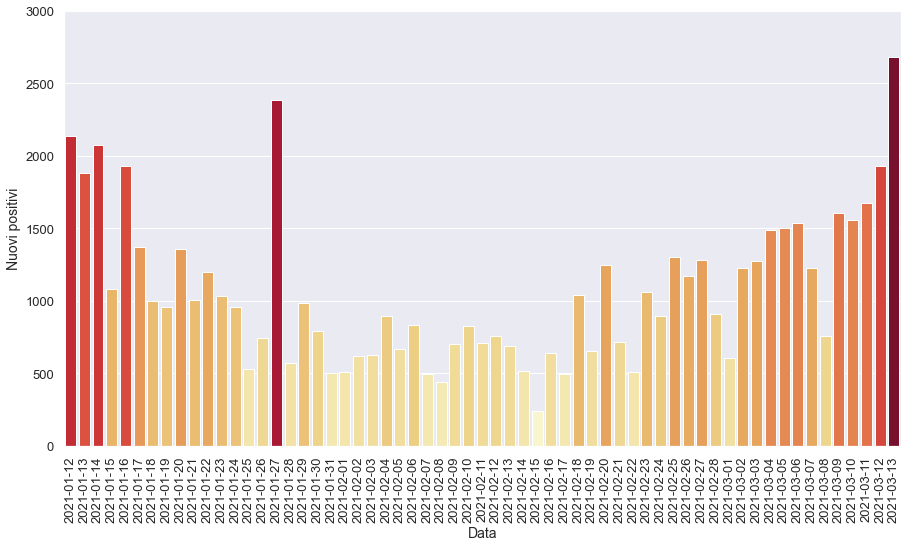

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

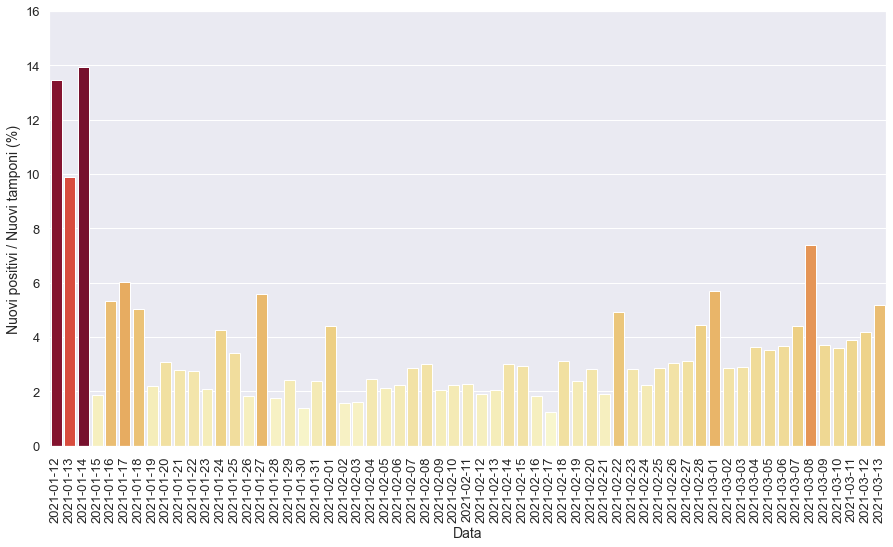

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

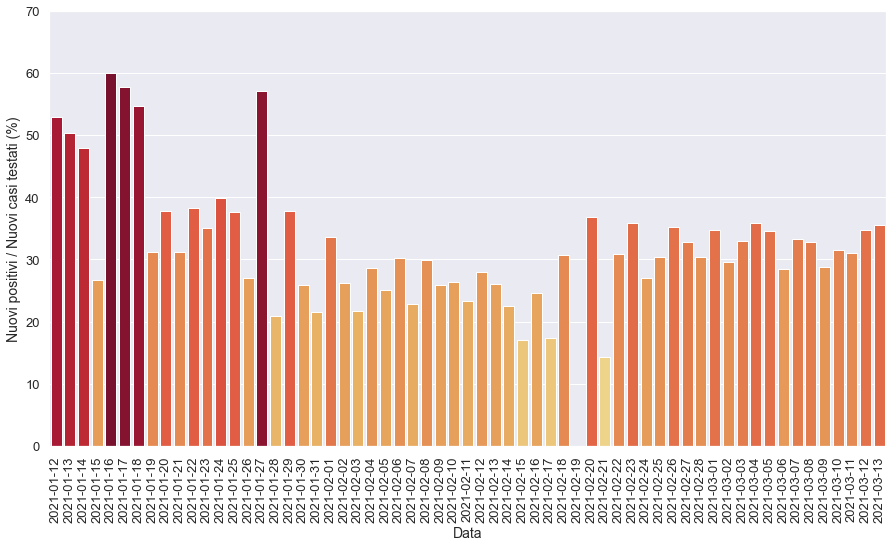

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

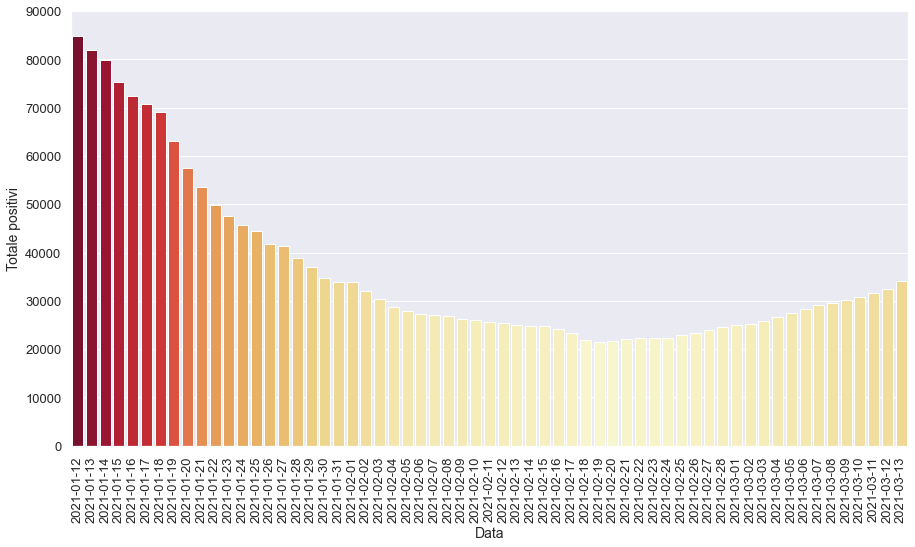

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

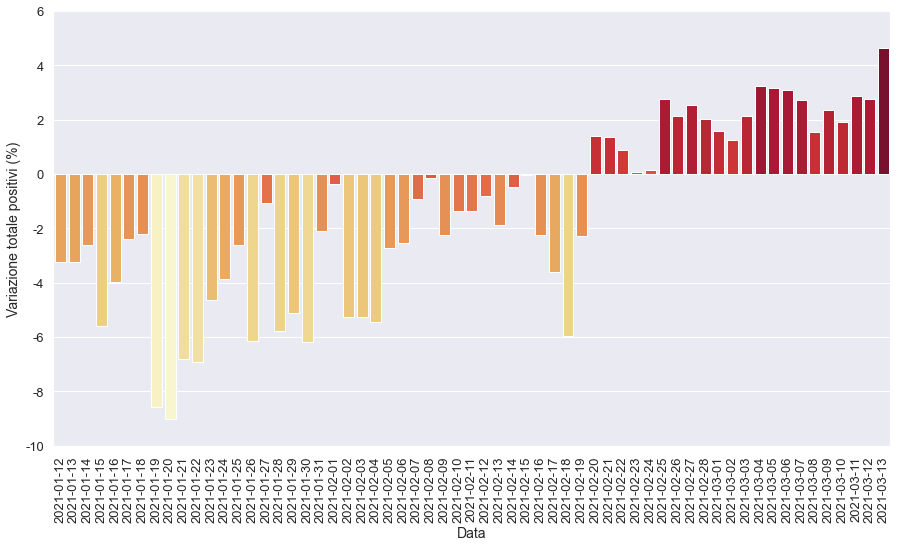

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

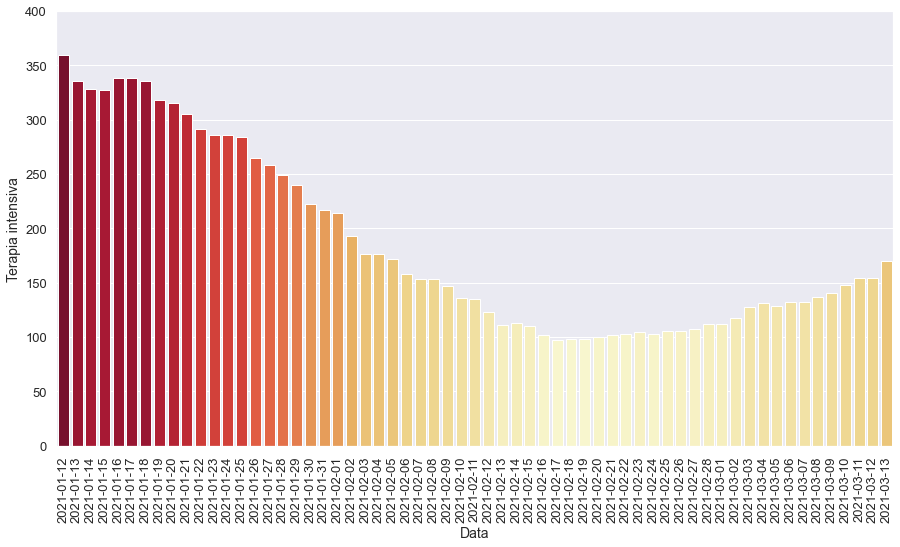

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

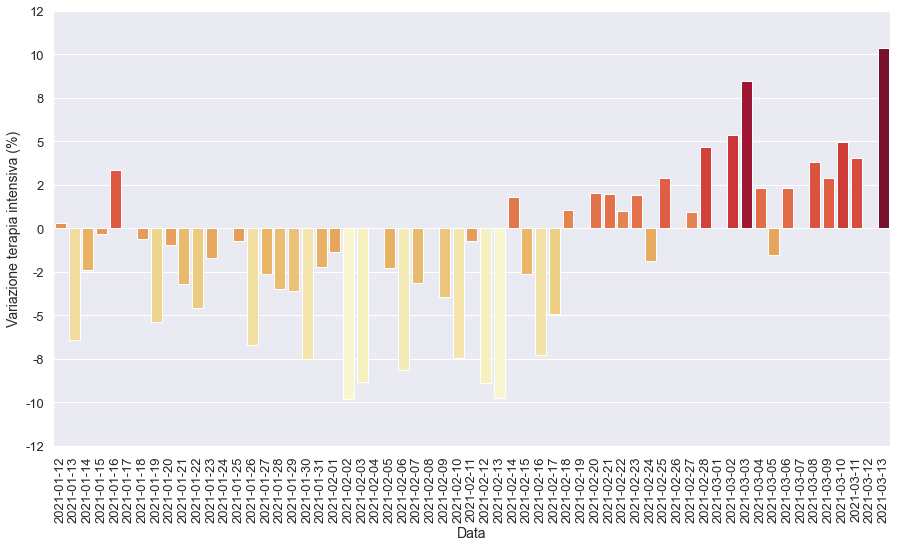

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

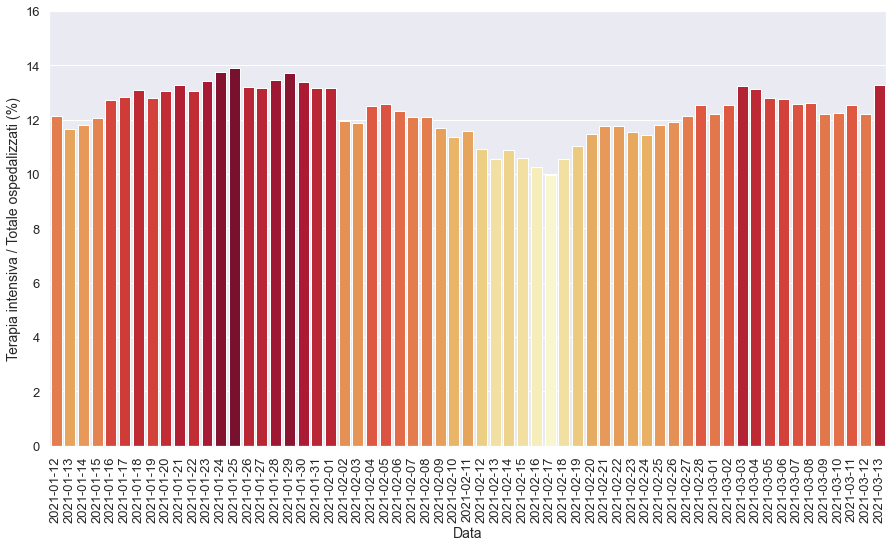

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

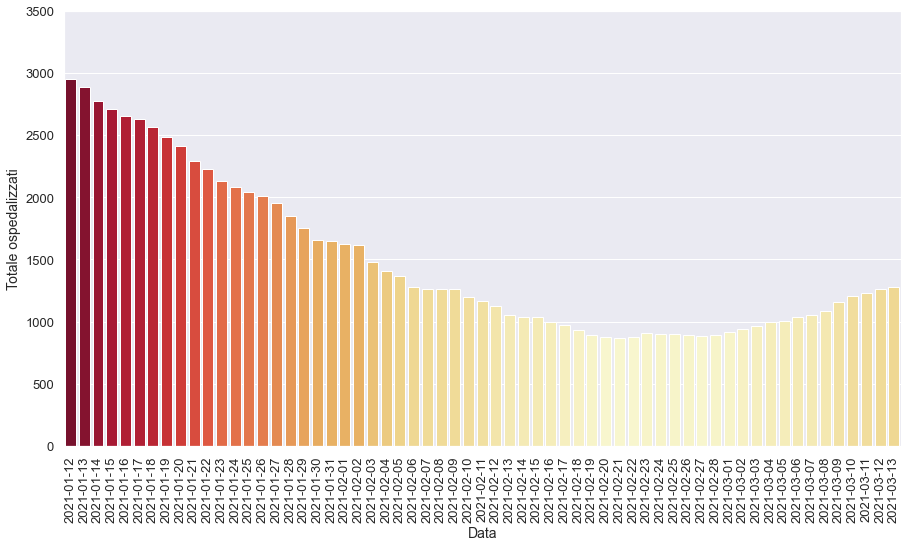

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

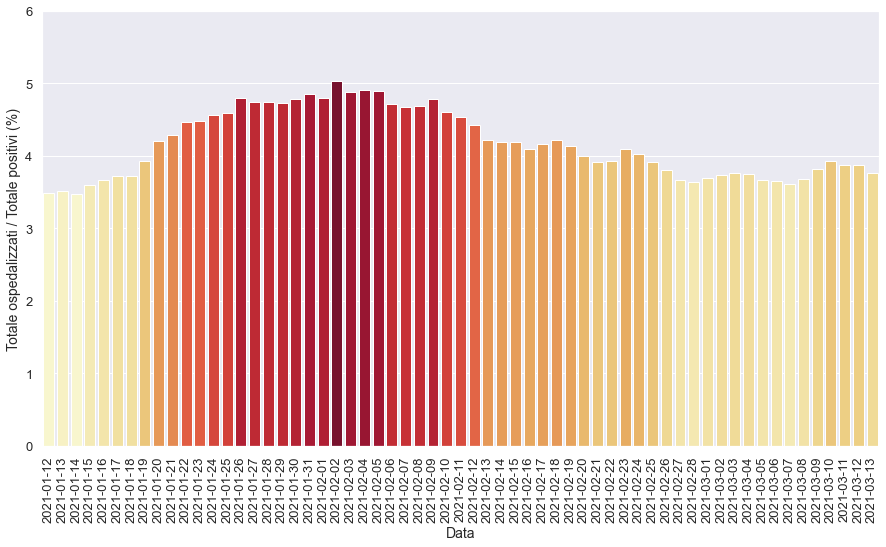

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

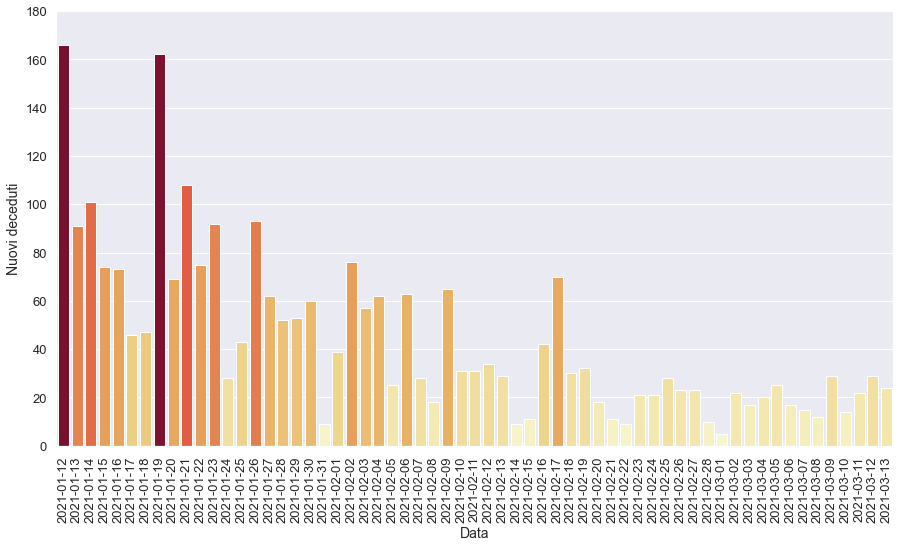

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

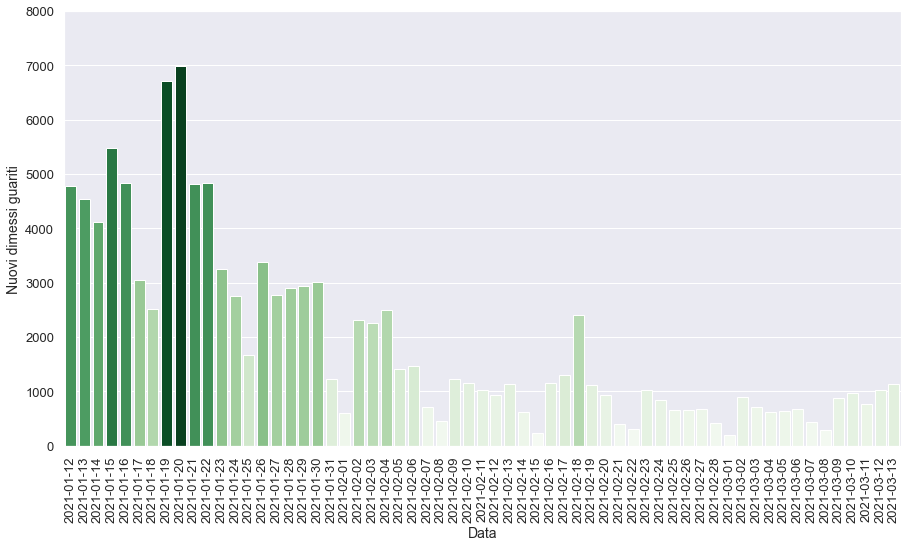

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-11T17:00:00,5,Veneto,1029,135,1164,24454,25618,-353,708,...,31.0,31277.0,3043.0,-319.0,11.60,4.54,2.26,23.27,-0.74,-1.36
1,2021-02-12T17:00:00,5,Veneto,1002,123,1125,24284,25409,-209,756,...,34.0,39581.0,2709.0,-170.0,10.93,4.43,1.91,27.91,-8.89,-0.82
2,2021-02-13T17:00:00,5,Veneto,942,111,1053,23876,24929,-480,689,...,29.0,33363.0,2646.0,-408.0,10.54,4.22,2.07,26.04,-9.76,-1.89
3,2021-02-14T17:00:00,5,Veneto,927,113,1040,23774,24814,-115,515,...,9.0,17106.0,2290.0,-102.0,10.87,4.19,3.01,22.49,1.80,-0.46
4,2021-02-15T17:00:00,5,Veneto,929,110,1039,23771,24810,-4,241,...,11.0,8221.0,1417.0,-3.0,10.59,4.19,2.93,17.01,-2.65,-0.02
5,2021-02-16T17:00:00,5,Veneto,893,102,995,23258,24253,-557,638,...,42.0,35030.0,2598.0,-513.0,10.25,4.10,1.82,24.56,-7.27,-2.25
6,2021-02-17T17:00:00,5,Veneto,875,97,972,22406,23378,-875,492,...,70.0,39030.0,2837.0,-852.0,9.98,4.16,1.26,17.34,-4.90,-3.61
7,2021-02-18T17:00:00,5,Veneto,830,98,928,21058,21986,-1392,1042,...,30.0,33254.0,3400.0,-1348.0,10.56,4.22,3.13,30.65,1.03,-5.95
8,2021-02-19T17:00:00,5,Veneto,790,98,888,20599,21487,-499,657,...,32.0,27341.0,0.0,-459.0,11.04,4.13,2.40,0.00,0.00,-2.27
9,2021-02-20T17:00:00,5,Veneto,772,100,872,20915,21787,300,1244,...,18.0,44145.0,3377.0,316.0,11.47,4.00,2.82,36.84,2.04,1.40


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

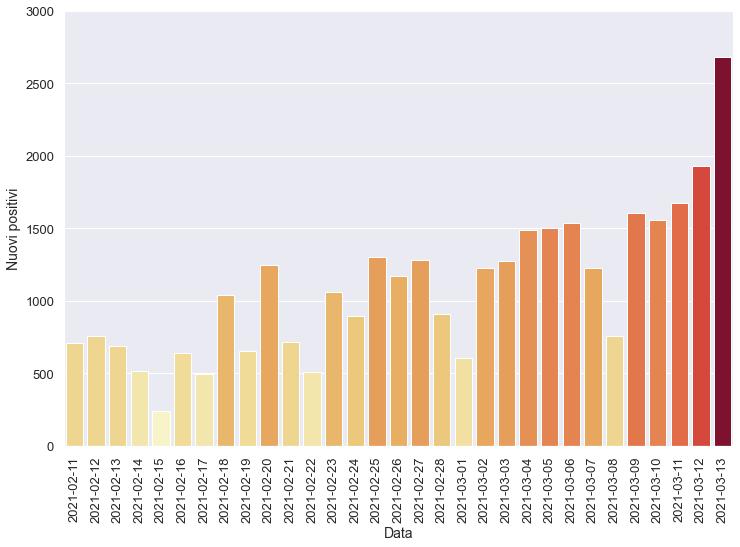

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

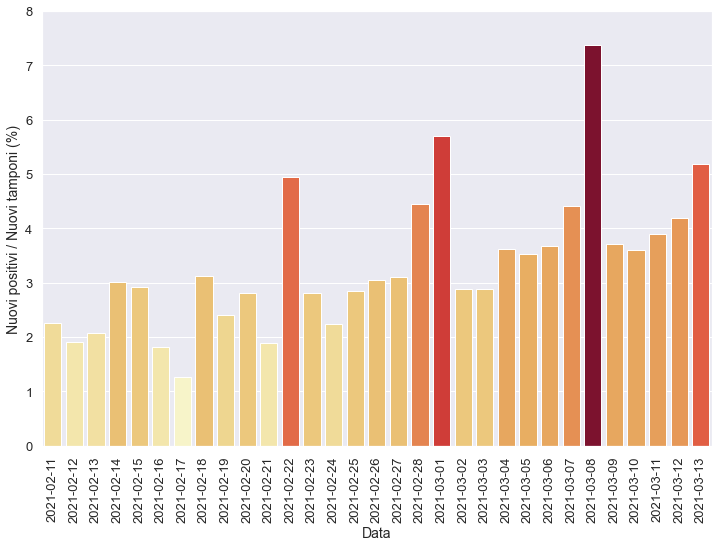

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

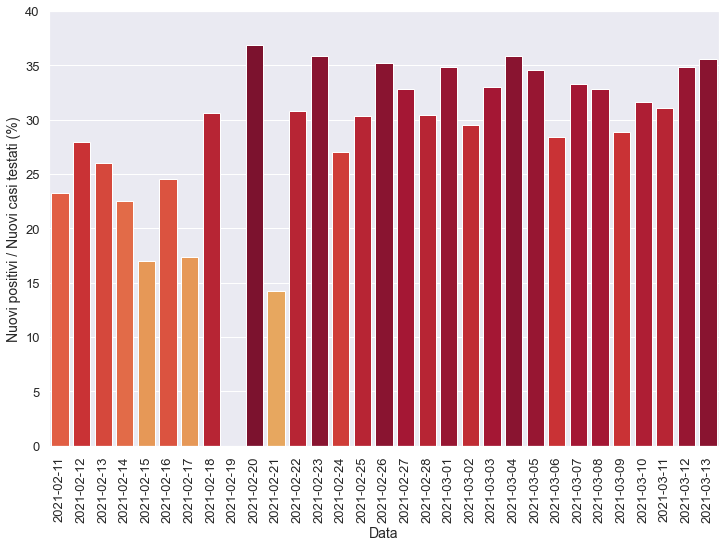

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

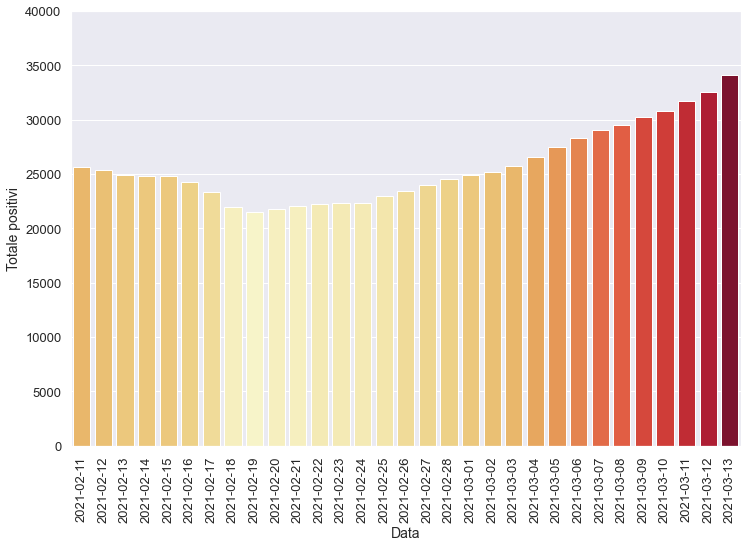

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

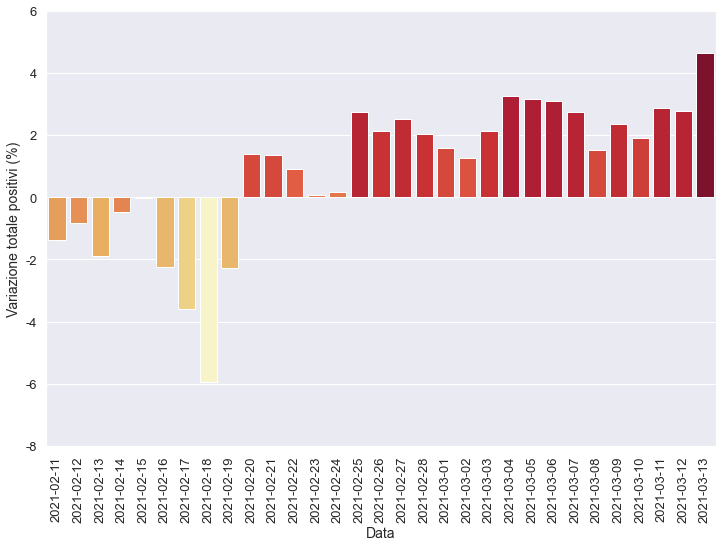

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

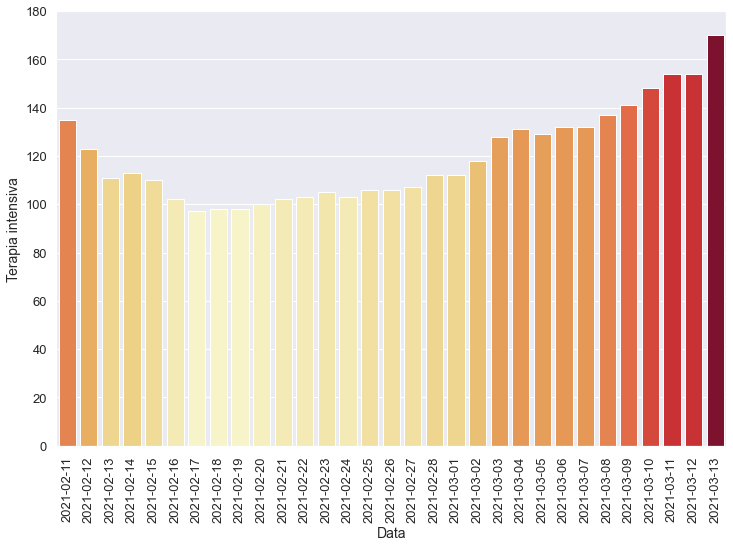

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

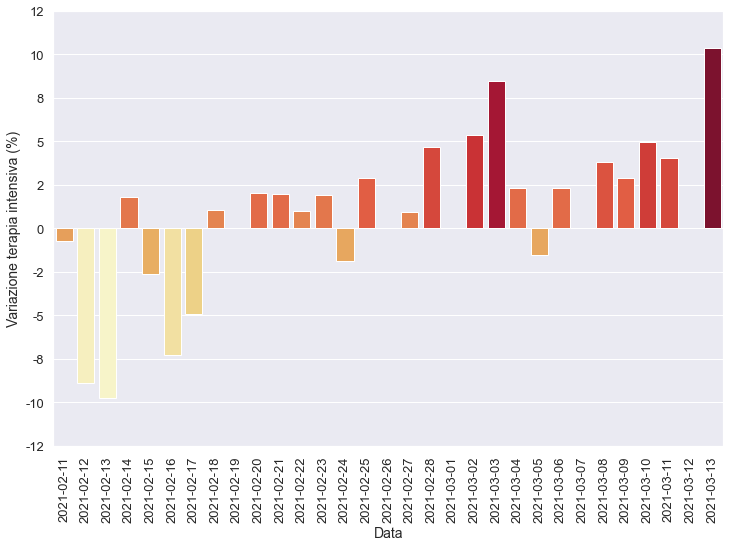

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

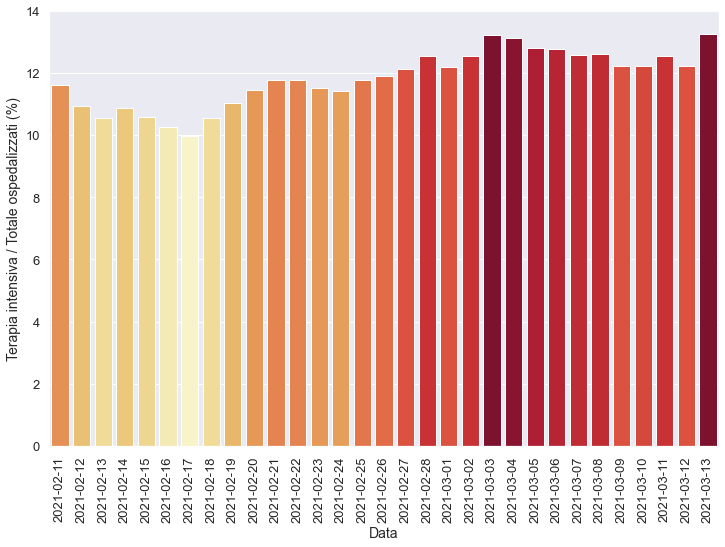

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

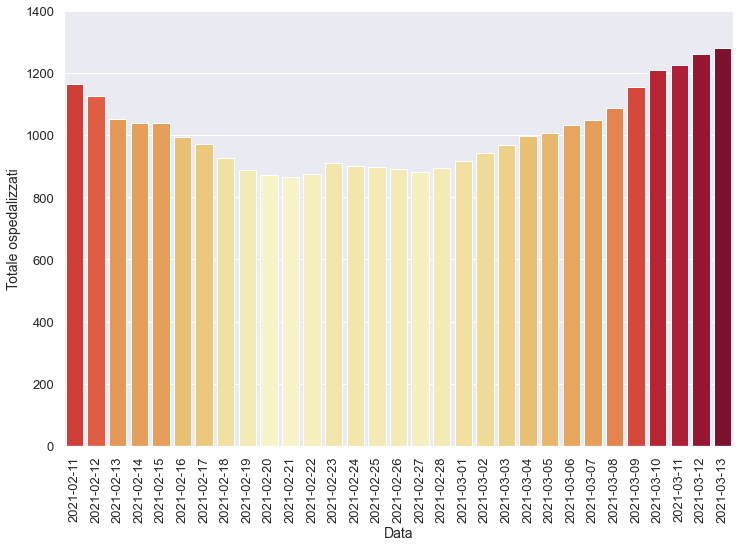

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

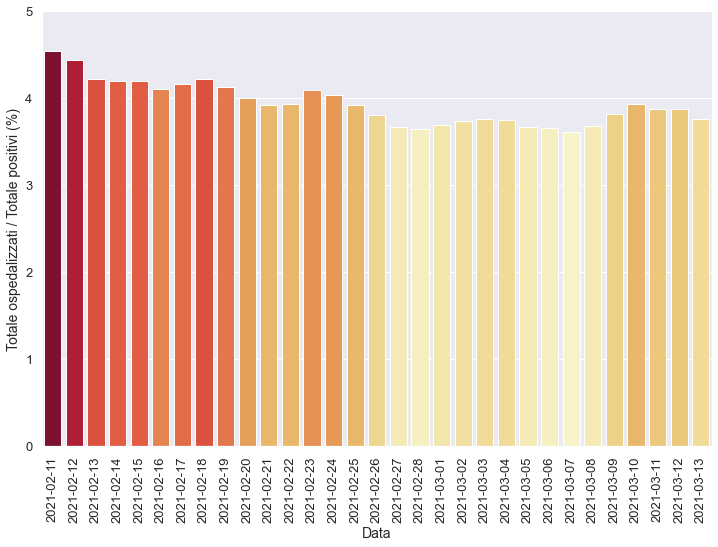

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

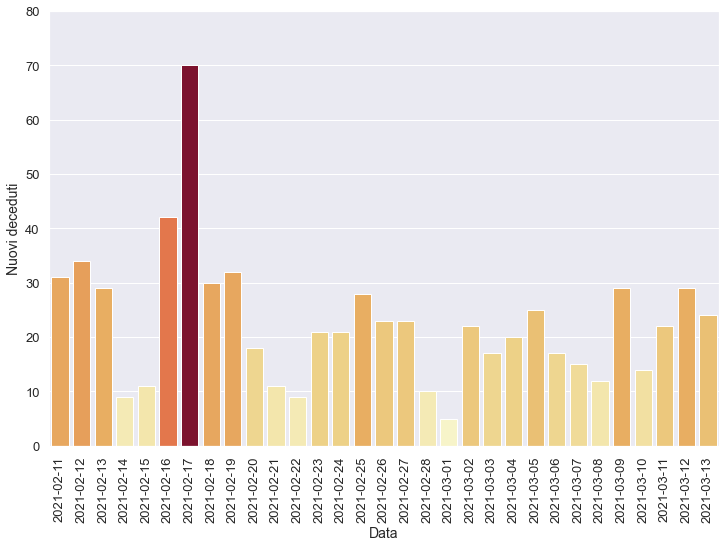

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

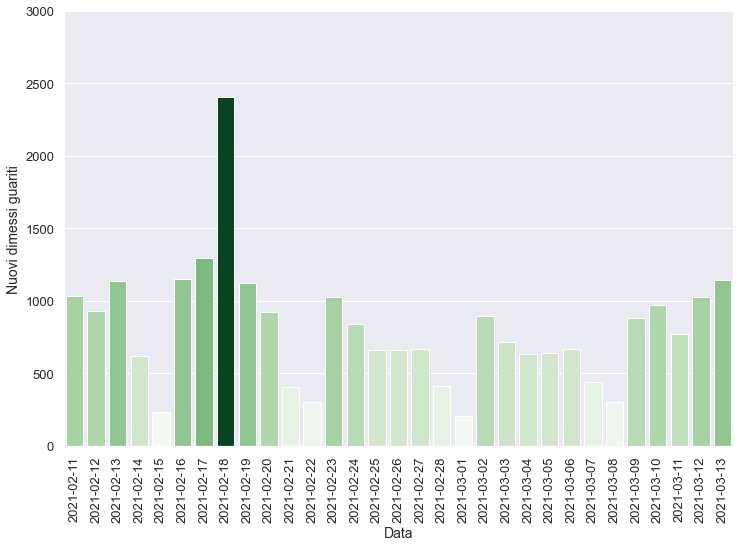

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-03-06T17:00:00,5,Veneto,902,132,1034,27258,28292,852,1539,...,17.0,41844.0,5419.0,825.0,12.77,3.65,3.68,28.40,2.33,3.10
1,2021-03-07T17:00:00,5,Veneto,917,132,1049,28019,29068,776,1229,...,15.0,27824.0,3696.0,761.0,12.58,3.61,4.42,33.25,0.00,2.74
2,2021-03-08T17:00:00,5,Veneto,950,137,1087,28427,29514,446,757,...,12.0,10260.0,2306.0,408.0,12.60,3.68,7.38,32.83,3.79,1.53
3,2021-03-09T17:00:00,5,Veneto,1013,141,1154,29056,30210,696,1608,...,29.0,43279.0,5577.0,629.0,12.22,3.82,3.72,28.83,2.92,2.36
4,2021-03-10T17:00:00,5,Veneto,1061,148,1209,29579,30788,578,1561,...,14.0,43293.0,4941.0,523.0,12.24,3.93,3.61,31.59,4.96,1.91
5,2021-03-11T17:00:00,5,Veneto,1073,154,1227,30447,31674,886,1677,...,22.0,42994.0,5395.0,868.0,12.55,3.87,3.90,31.08,4.05,2.88
6,2021-03-12T17:00:00,5,Veneto,1106,154,1260,31290,32550,876,1932,...,29.0,46146.0,5550.0,843.0,12.22,3.87,4.19,34.81,0.00,2.77
7,2021-03-13T17:00:00,5,Veneto,1111,170,1281,32781,34062,1512,2682,...,24.0,51799.0,7547.0,1491.0,13.27,3.76,5.18,35.54,10.39,4.65


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

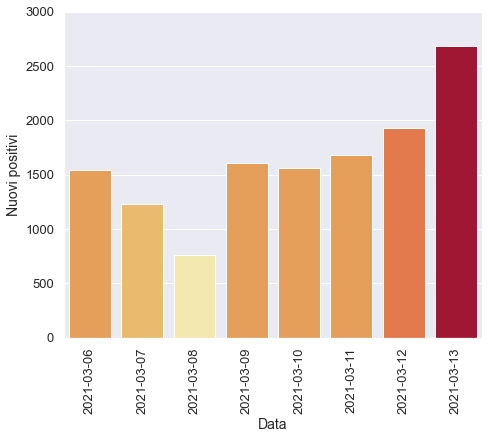

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

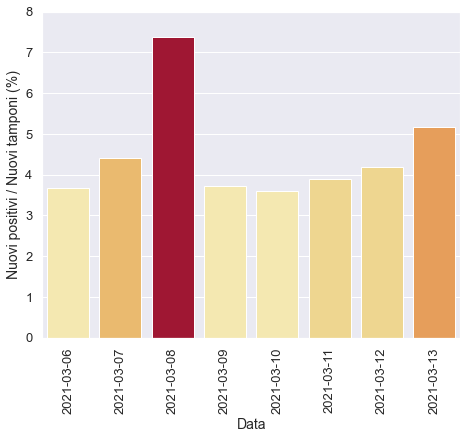

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

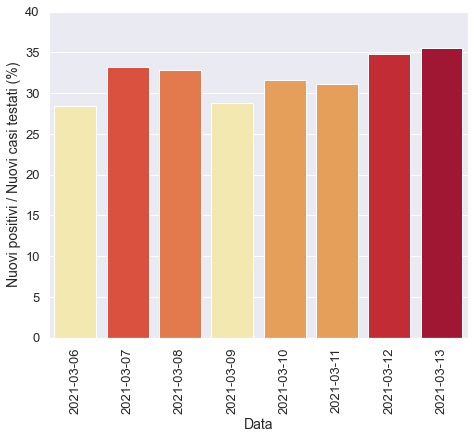

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

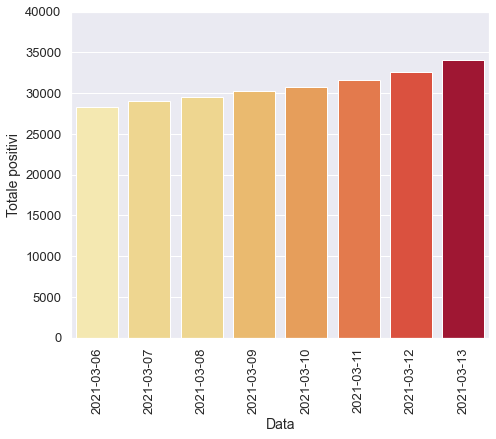

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

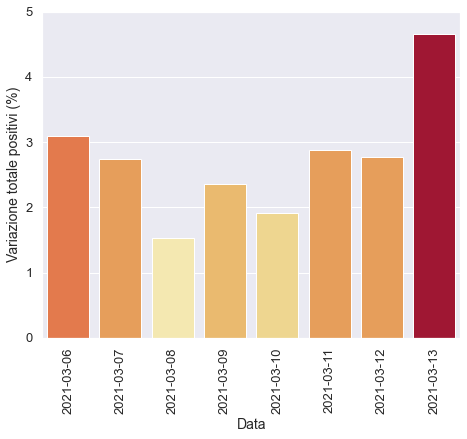

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

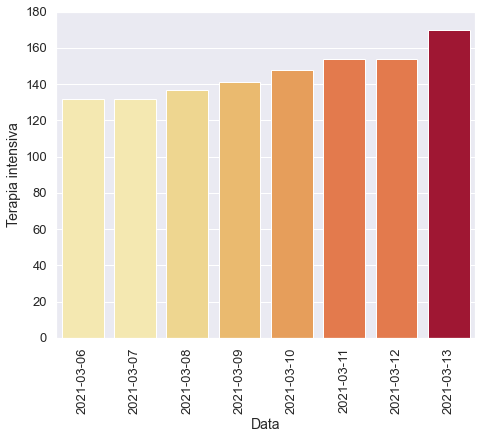

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

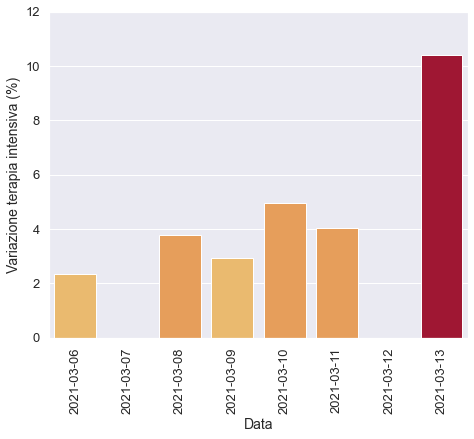

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

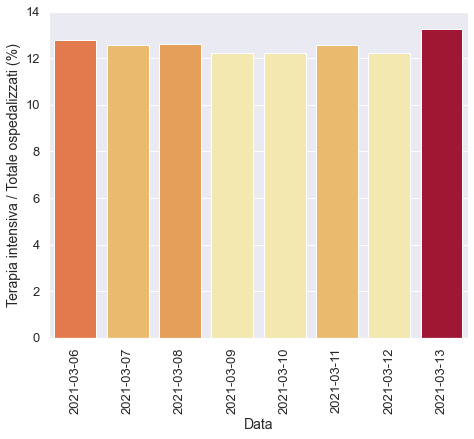

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

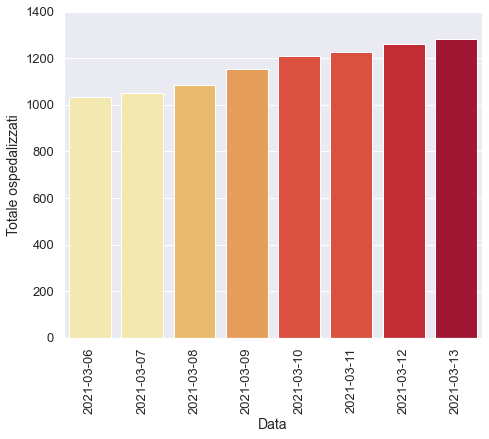

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

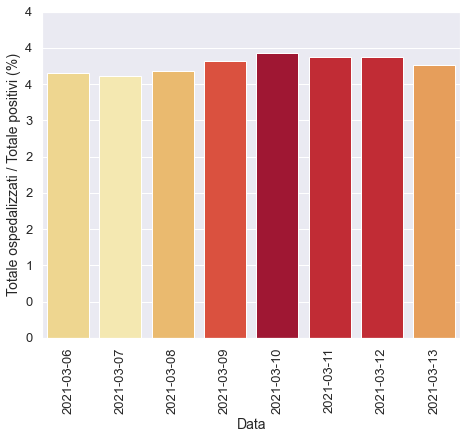

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

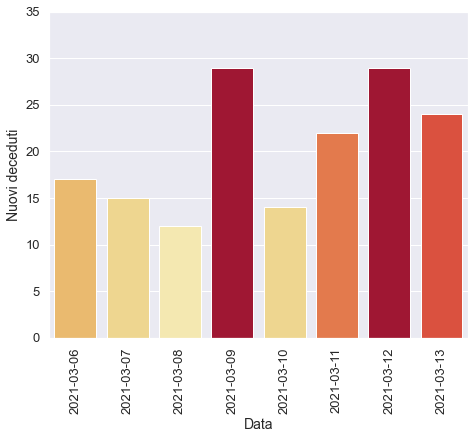

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

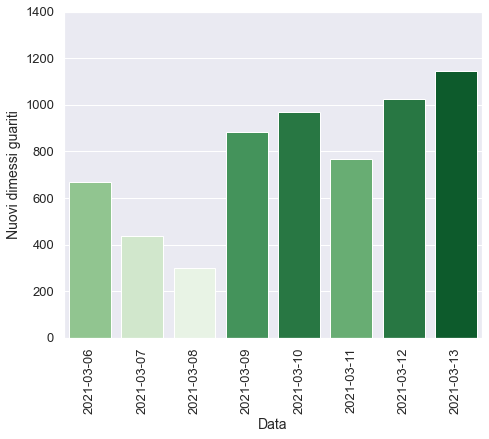

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)